In [1]:
#EDA Anberd and Patent

In [2]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn import preprocessing
from statsmodels.tsa.stattools import adfuller
import matplotlib.ticker as ticker

In [3]:
#loading Pat dataset from worldbank
dfPat = pd.read_csv('PAT.csv')
dfPat.head()

,KINDPATENT,Patents Office & Patents Families,KINDCOUNTRY,Reference country,LOCATION,Country,IPC,Technology domains & IPC,KINDDATE,Reference Date,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,1999,NBR,Number,0,Units,NaN,NaN,7216.0872,NaN,NaN
1,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2000,NBR,Number,0,Units,NaN,NaN,7305.6126,NaN,NaN
2,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2001,NBR,Number,0,Units,NaN,NaN,7325.8377,NaN,NaN
3,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2002,NBR,Number,0,Units,NaN,NaN,7461.2570,NaN,NaN
4,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2003,NBR,Number,0,Units,NaN,NaN,7969.9370,NaN,NaN


In [43]:
#cleaning
dfPat2 =  dfPat.loc[dfPat["KINDPATENT"].isin(["IP5"])]
dfPat3 =  dfPat2.loc[dfPat2["KINDCOUNTRY"].isin(["INVENTORS"])]
dfPat4 = dfPat3[["Country", "Technology domains & IPC", "Time", "Value"]]
dfPat5 = dfPat4.rename(columns={"Technology domains & IPC": "Domain"})
dfPat6 = dfPat5[dfPat5.Domain != "Total Patents"]
dfPatT = dfPat5[dfPat5["Domain"]=="Total Patents"]
dfPatT = dfPatT[["Country","Time", "Value"]]
dfPatT["Time"] = pd.to_datetime(dfPatT.Time, format='%Y')
dfPatT['Value'] = dfPatT['Value'].astype(int)
dfPatT.head()

,Country,Time,Value
4456,France,1999-01-01,7149
4457,France,2000-01-01,7328
4458,France,2001-01-01,7255
4459,France,2002-01-01,7312
4460,France,2003-01-01,7758


In [5]:
dfPatT.isna().sum()

Country    0
Time       0
Value      0
dtype: int64

Text(0.5, 1.0, 'Patents per Technology Filed for 1999 to 2019')

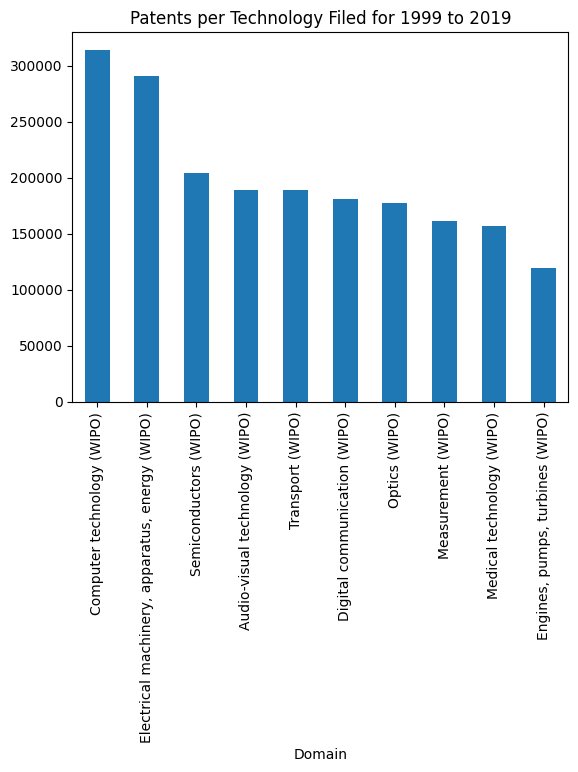

In [6]:
dfPat6.groupby('Domain')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()
plt.title('Patents per Technology Filed for 1999 to 2019')

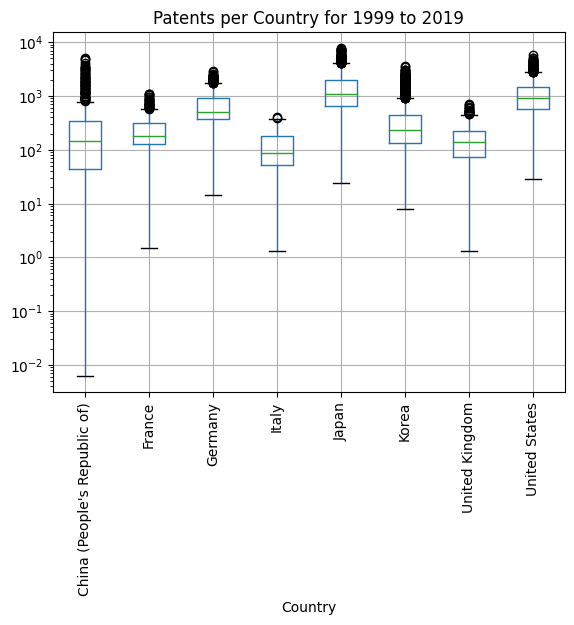

In [7]:
dfPat6.boxplot(column = "Value", by='Country')
plt.xticks(rotation=90)
plt.suptitle('')
plt.title('Patents per Country for 1999 to 2019')
plt.semilogy();

In [8]:
def pattrend(country:str, group:str, columnlist:list, sumby:str):
    df = dfPatT[(dfPatT.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

France
Germany
Italy
Japan
Korea
United Kingdom
United States
China (People's Republic of)


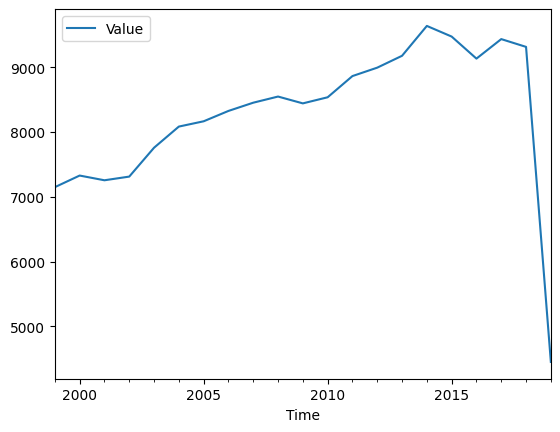

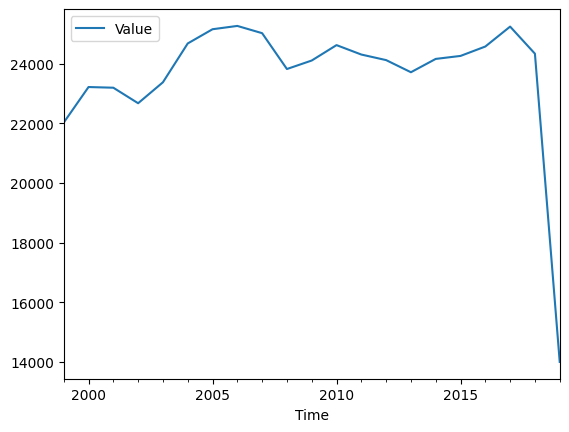

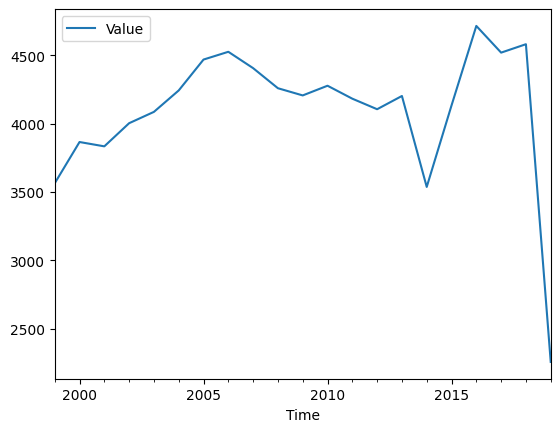

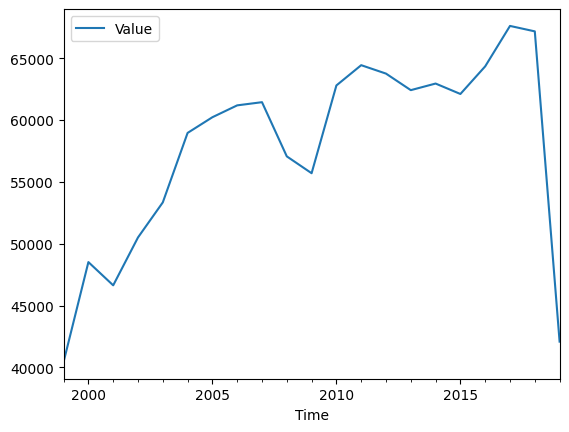

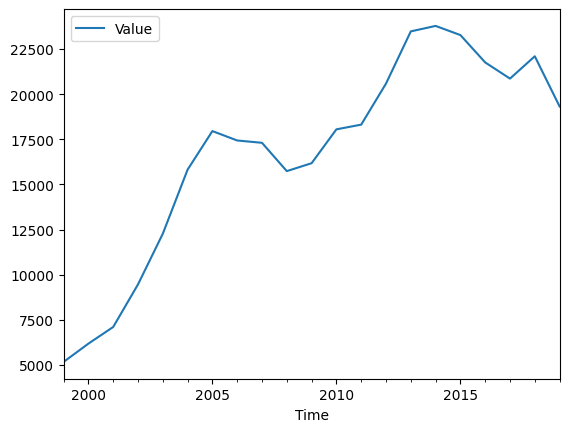

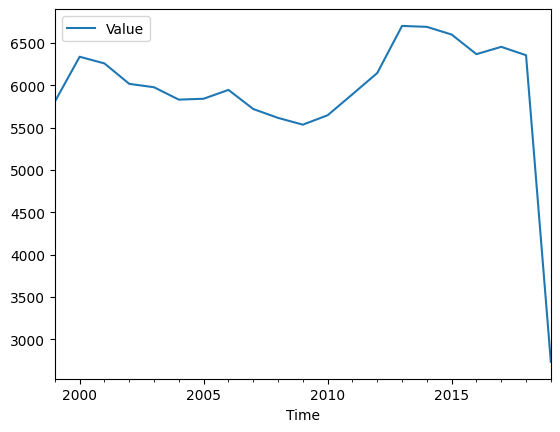

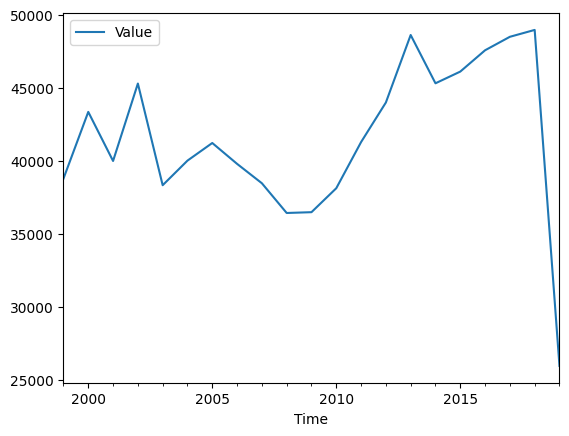

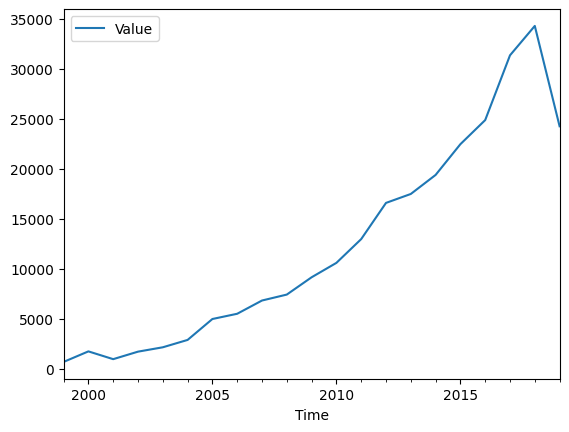

In [9]:
for i in dfPatT.Country.unique():
    pattrend(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

TypeError: Axes.text() missing 1 required positional argument: 's'

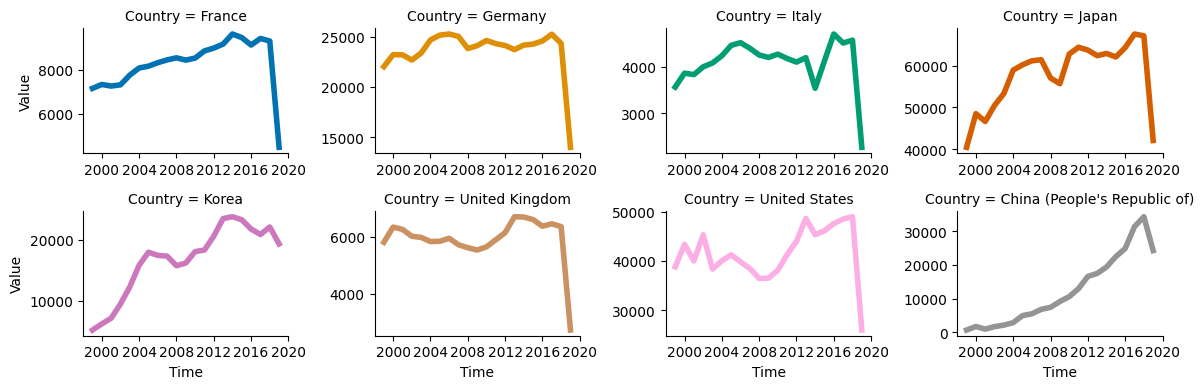

In [10]:
g = sns.relplot(
    data = dfPatT,
    x = "Time", y="Value", col="Country", hue="Country",
    kind="line", palette="colorblind", linewidth=4, zorder=5,
    col_wrap=4, height=2, aspect=1.5, legend=False, facet_kws=dict(sharey=False, sharex = False),
)

for year, ax in g.axes_dict.items():

    ax.text(.8, .85, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=dfPatT, x="Time", y="Value",
    )
#ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Patents per Country over Time")

In [11]:
dfRD = pd.read_csv('ANBERD_3.csv')
dfRD.head()

,LOCATION,Country,CRITERIA,Classification criteria,CUR,Measure,IND,Industry,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2007,2007,USD,US Dollar,0,Units,NaN,NaN,27850484039,NaN,NaN
1,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2008,2008,USD,US Dollar,0,Units,NaN,NaN,29211879149,NaN,NaN
2,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2009,2009,USD,US Dollar,0,Units,NaN,NaN,30622218219,NaN,NaN
3,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2010,2010,USD,US Dollar,0,Units,NaN,NaN,32124446864,NaN,NaN
4,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2011,2011,USD,US Dollar,0,Units,NaN,NaN,34290381593,NaN,NaN


In [12]:
df2RD = dfRD[["LOCATION", "Country", "Industry", "Time", "Value"]]
df2RD["Industry"] = df2RD['Industry'].str.capitalize()
df2RD["Time"] = pd.to_datetime(df2RD.Time, format='%Y')
df2RD.head()

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\1758969511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2RD["Industry"] = df2RD['Industry'].str.capitalize()
C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\1758969511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2RD["Time"] = pd.to_datetime(df2RD.Time, format='%Y')


,LOCATION,Country,Industry,Time,Value
0,FRA,France,Total business enterprise,2007-01-01,27850484039
1,FRA,France,Total business enterprise,2008-01-01,29211879149
2,FRA,France,Total business enterprise,2009-01-01,30622218219
3,FRA,France,Total business enterprise,2010-01-01,32124446864
4,FRA,France,Total business enterprise,2011-01-01,34290381593


<AxesSubplot: xlabel='Country'>

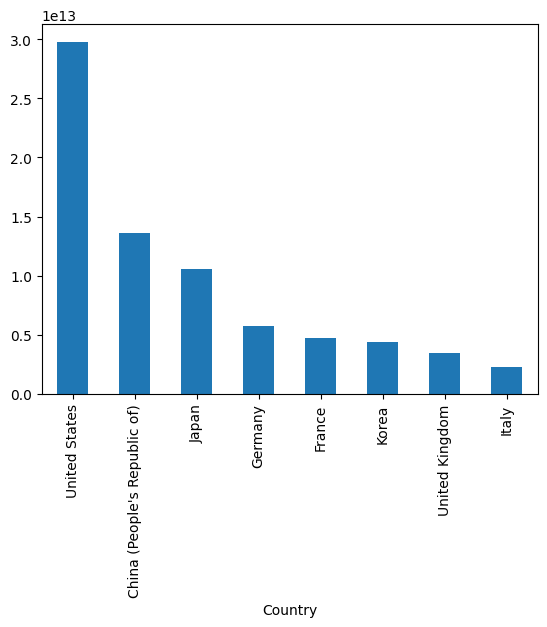

In [13]:
df2RD.groupby('Country')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Time'>

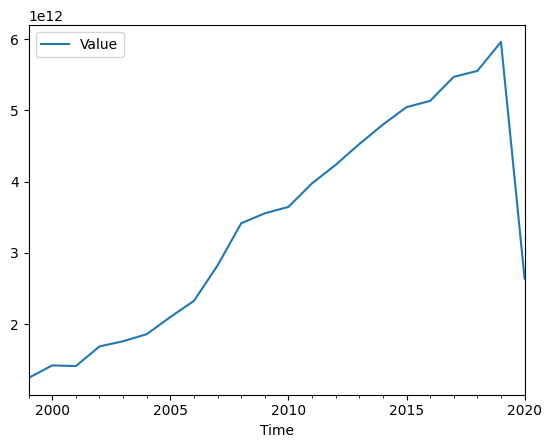

In [14]:
df2_line = df2RD[["Time", "Value"]].groupby("Time").sum("Value")
df2_line.plot()

In [ ]:
def exptrend(country:str, group:str, columnlist:list, sumby:str):
    df = df2RD[(df2RD.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

In [ ]:
#line plot R&D expenditure for China, Germany, Japan, and US
for i in df2RD.Country.unique():
    exptrend(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

In [ ]:
g = sns.relplot(
    data = df2RD,
    x = "Time", y="Value", col="Country", hue="Country",
    kind="line", palette="colorblind", linewidth=4,
    col_wrap=4, legend=False, facet_kws=dict(sharey=False, sharex = False), errorbar=None,
)

for year, ax in g.axes_dict.items():

    ax.text(.8, .85, transform=ax.transAxes, fontweight="bold")

    #sns.lineplot(
       # data=dfPatT, x="Time", y="Value",
    #)
#ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Patents per Country over Time")

In [ ]:
g = sns.relplot(
    data = df2RD,
    x = "Time", y="Value", col="Country", hue="Country",
    kind="line", palette="colorblind", linewidth=4,
    col_wrap=4, legend=False, facet_kws=dict(sharey=False, sharex = False),
)

for year, ax in g.axes_dict.items():

    ax.text(.8, .85, transform=ax.transAxes, fontweight="bold")

    #sns.lineplot(
       # data=dfPatT, x="Time", y="Value",
    #)
#ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Patents per Country over Time")

In [ ]:
df2RD.boxplot(column = "Value", by='Country')
plt.xticks(rotation=90)
plt.suptitle('')
plt.title('R&D Expenditure per Country for 1999 to 2019')
plt.semilogy();

In [ ]:
df2RD.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

In [15]:
Ch = df2RD.loc[df2RD["Country"].isin(["China (People's Republic of)"])]
US = df2RD.loc[df2RD["Country"].isin(["United States"])]
Ge = df2RD.loc[df2RD["Country"].isin(["Germany"])]
Jap = df2RD.loc[df2RD["Country"].isin(["Japan"])]
Fr = df2RD.loc[df2RD["Country"].isin(["France"])]
UK = df2RD.loc[df2RD["Country"].isin(["United Kingdom"])]
Kor = df2RD.loc[df2RD["Country"].isin(["Korea"])]
It = df2RD.loc[df2RD["Country"].isin(["Italy"])]

In [63]:
#linear regression Germany
#calculating annual R&D expenditure and then differences between years
Ge["RD_Exp"] = Ge["Value"]
dfGEExp = Ge.groupby("Time").sum('RD_Exp').reset_index()
#dfGEExp['DifExp'] = dfGEExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
GEPat = dfPatT.loc[dfPatT["Country"].isin(["Germany"])]
GEPat["Patents"] = GEPat["Value"]
dfGEPat = GEPat.groupby("Time").sum('Patents').reset_index()
#dfGEPat['DifPat'] = dfGEPat['Patents'].shift(1)
dfGEPat.head()

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\2597361361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ge["RD_Exp"] = Ge["Value"]
C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\2597361361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPat["Patents"] = GEPat["Value"]


,Time,Value,Patents
0,1999-01-01,22023,22023
1,2000-01-01,23215,23215
2,2001-01-01,23192,23192
3,2002-01-01,22672,22672
4,2003-01-01,23374,23374


In [64]:
#choosing same data type for merge column
dfGEExp["Time"]=Ge["Time"].astype("int64")
dfGEPat["Time"]=dfGEPat["Time"].astype("int64")

#merging GDP and Exp data
mergedGEExpPat = dfGEPat.merge(dfGEExp, on="Time")

,Time,Value_x,Patents,Value_y,R&D_Exp,RD_Exp
0,915148800000000000,22023,22023,270297412779,270297412779,270297412779
1,946684800000000000,23215,23215,300513034243,300513034243,300513034243
2,978307200000000000,23192,23192,316250097538,316250097538,316250097538
3,1009843200000000000,22672,22672,319710880791,319710880791,319710880791
4,1041379200000000000,23374,23374,340412555166,340412555166,340412555166


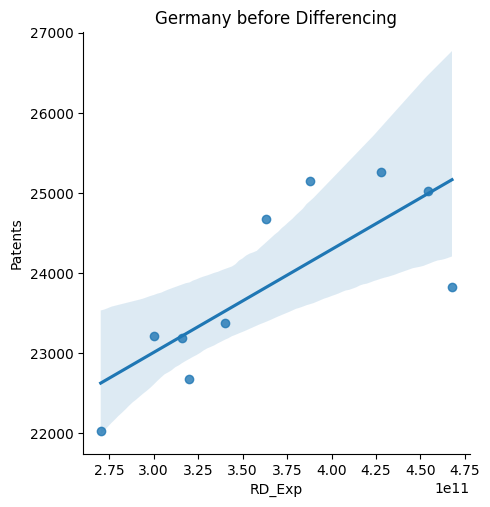

In [81]:
#line plot between GDP and R&D expenditure 
sns.lmplot(x="RD_Exp",y="Patents", data=mergedGEExpPat).set(title = "Germany before Differencing")

In [66]:
indep = dfGEExp[["RD_Exp"]]
dep = dfGEPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   2.008
Model:                            OLS   Adj. R-squared (uncentered):              2.061
Method:                 Least Squares   F-statistic:                             -37.86
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                        1.00
Time:                        07:31:31   Log-Likelihood:                         -210.13
No. Observations:                  20   AIC:                                      422.3
Df Residuals:                      19   BIC:                                      423.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp       7.42e-08   6.81e-09     10.895      0.000    5.99e-08    8.85e-08
==============================================================================
Omnibus:                        6.592   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.218
Skew:                          -1.052   Prob(JB):                        0.121
Kurtosis:                       3.797   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#Pearson, Kendall, and Spearman correlation for Germany
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.31688215046548135, pvalue=0.17342480031295604)

In [69]:
spearmanr(S,T)

SpearmanrResult(correlation=0.1819548872180451, pvalue=0.44262106677574986)

In [70]:
kendalltau(S,T)

KendalltauResult(correlation=0.1473684210526316, pvalue=0.3858571513151256)

In [71]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 7.258873
p-value: 1.000000
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [72]:
#making data stationary
dfP_log=np.sqrt(dfGEPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfGEExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [74]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,13050.049307,3.963212
2,4903.216613,-0.075496
3,7724.470050,-1.716957
4,10579.850866,2.313336
5,7055.547858,4.197203


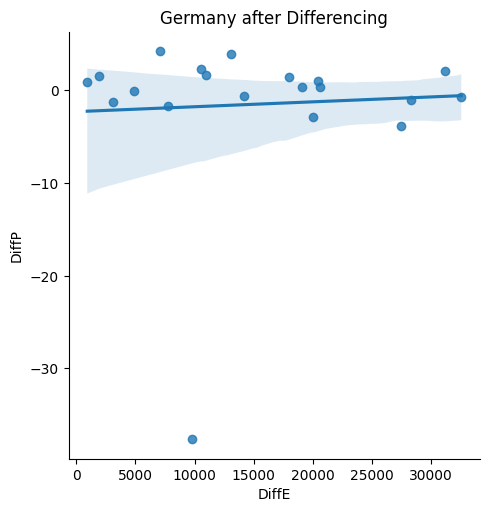

In [80]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "Germany after Differencing")

In [76]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):             -0.036
Method:                 Least Squares   F-statistic:                             0.3345
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                       0.570
Time:                        07:33:19   Log-Likelihood:                         -68.182
No. Observations:                  19   AIC:                                      138.4
Df Residuals:                      18   BIC:                                      139.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp     -6.612e-05      0.000     -0.578      0.570      -0.000       0.000
==============================================================================
Omnibus:                       46.287   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.221
Skew:                          -3.730   Prob(JB):                     6.60e-38
Kurtosis:                      15.674   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Pearson, Kendall, and Spearman correlation for Germany
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.06710491919258144, pvalue=0.7848892310510864)

In [78]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.198574
p-value: 0.000663
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


In [245]:
#linear regression China
#calculating annual R&D expenditure and then differences between years
Ch["RD_Exp"] = Ch["Value"]
dfCHExp = Ch.groupby("Time").sum('RD_Exp').reset_index()
#dfCHExp['DifExp'] = dfCHExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfCHPat = dfPatT.loc[dfPatT["Country"].isin(["China (People's Republic of)"])].reset_index()
dfCHPat["Patents"] = dfCHPat["Value"]
#dfCHPat['DifPat'] = dfCHPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\3097179526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ch["RD_Exp"] = Ch["Value"]


In [246]:
#choosing same data type for merge column
dfCHPat["Time"]=dfCHPat["Time"].astype("int64")
dfCHExp["Time"]=dfCHExp["Time"].astype("int64")
#merging GDP and Exp data
mergedCHExpPat = dfCHPat.merge(dfCHExp, on="Time")

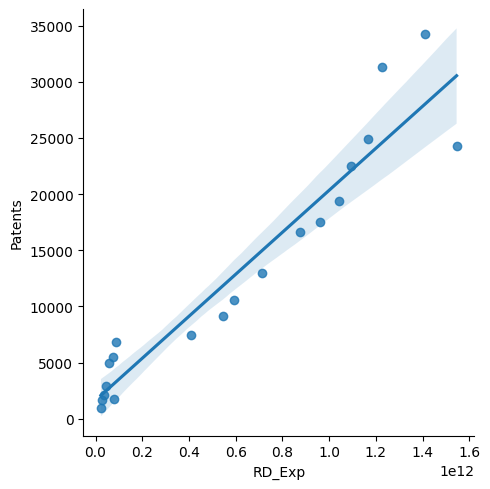

In [247]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="RD_Exp",y="Patents", data=mergedCHExpPat)

In [248]:
indep = dfCHExp[["RD_Exp"]]
dep = dfCHPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              108.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                    2.67e-09
Time:                        08:46:32   Log-Likelihood:                         -187.28
No. Observations:                  20   AIC:                                      376.6
Df Residuals:                      19   BIC:                                      377.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      1.859e-08   7.46e-10     24.928      0.000     1.7e-08    2.02e-08
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.448
Skew:                           0.115   Prob(JB):                        0.799
Kurtosis:                       2.304   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
#Pearson, Kendall, and Spearman correlation for China
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.961620519791367, pvalue=1.4926085644366158e-11)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [250]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.305455
p-value: 0.977593
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


In [251]:
#making data stationary
dfP_log=np.sqrt(dfCHPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfCHExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [252]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,-126724.871792,15.521706
2,18809.896652,-10.681066
3,17218.343442,10.356163
4,27530.519647,4.968904
5,26866.354161,7.354888


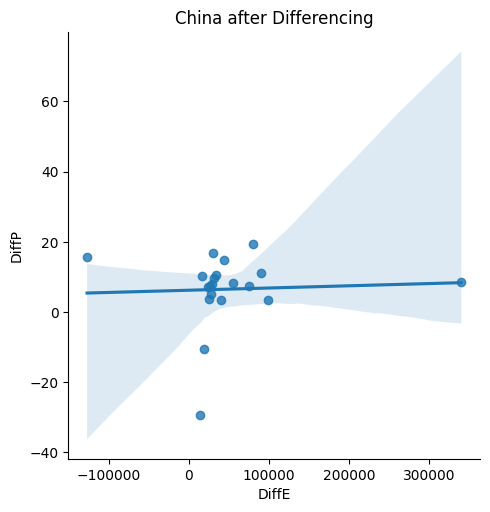

In [253]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "China after Differencing")

In [254]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.192
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              4.273
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                      0.0534
Time:                        08:46:48   Log-Likelihood:                         -72.052
No. Observations:                  19   AIC:                                      146.1
Df Residuals:                      18   BIC:                                      147.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp        5.7e-05   2.76e-05      2.067      0.053    -9.3e-07       0.000
==============================================================================
Omnibus:                       16.370   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.842
Skew:                          -1.689   Prob(JB):                     0.000363
Kurtosis:                       5.933   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
#Pearson, Kendall, and Spearman correlation for China
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.17847353481216563, pvalue=0.46475779291625324)

In [256]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.814518
p-value: 0.373278
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


In [257]:
#linear regression US
#calculating annual R&D expenditure and then differences between years
US["RD_Exp"] = US["Value"]
dfUSExp = US.groupby("Time").sum('RD_Exp').reset_index()
#dfUSExp['DifExp'] = dfUSExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfUSPat = dfPatT.loc[dfPatT["Country"].isin(["United States"])].reset_index()
dfUSPat["Patents"] = dfUSPat["Value"]
#dfUSPat['DifPat'] = dfUSPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\4213030288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US["RD_Exp"] = US["Value"]


In [258]:
#choosing same data type for merge column
dfUSPat["Time"]=dfUSPat["Time"].astype("int64")
dfUSExp["Time"]=dfUSExp["Time"].astype("int64")

#merging GDP and Exp data
mergedUSExpPat = dfUSPat.merge(dfUSExp, on="Time")

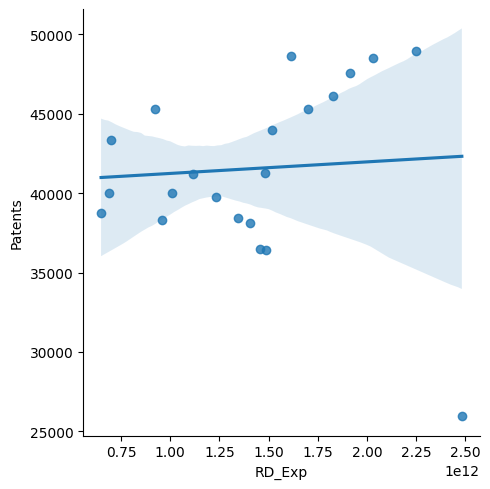

In [259]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="RD_Exp",y="Patents", data=mergedUSExpPat)

In [260]:
indep = dfUSExp[["RD_Exp"]]
dep = dfUSPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                  -2.926
Model:                            OLS   Adj. R-squared (uncentered):             -3.133
Method:                 Least Squares   F-statistic:                             -14.16
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                        1.00
Time:                        08:47:07   Log-Likelihood:                         -219.16
No. Observations:                  20   AIC:                                      440.3
Df Residuals:                      19   BIC:                                      441.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp       2.59e-08   2.08e-09     12.449      0.000    2.15e-08    3.03e-08
==============================================================================
Omnibus:                       12.255   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.437
Skew:                          -1.183   Prob(JB):                      0.00328
Kurtosis:                       5.851   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
#Pearson, Kendall, and Spearman correlation for US
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.02953982480764661, pvalue=0.9016112249813042)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [262]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.638703
p-value: 0.997969
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [263]:
#making data stationary
dfP_log=np.sqrt(dfUSPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfUSExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [264]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,30750.551033,11.279971
2,-6862.634132,-8.238933
3,130068.326469,12.851373
4,20640.960339,-17.048489
5,24913.840016,4.257116


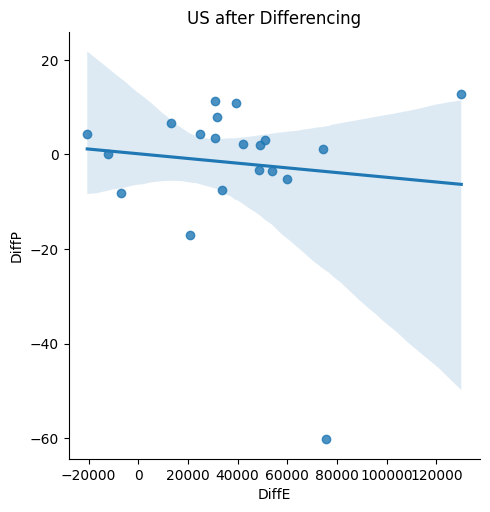

In [265]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "US after Differencing")

In [266]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.019
Method:                 Least Squares   F-statistic:                             0.6387
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                       0.435
Time:                        08:47:24   Log-Likelihood:                         -78.666
No. Observations:                  19   AIC:                                      159.3
Df Residuals:                      18   BIC:                                      160.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp     -5.568e-05   6.97e-05     -0.799      0.435      -0.000    9.07e-05
==============================================================================
Omnibus:                       29.535   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.494
Skew:                          -2.458   Prob(JB):                     8.91e-13
Kurtosis:                       9.777   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
#Pearson, Kendall, and Spearman correlation for US
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.09880696950846715, pvalue=0.6873618909143356)

In [268]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.360568
p-value: 0.000348
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


In [177]:
#linear regression Japan
#calculating annual R&D expenditure and then differences between years
Jap["RD_Exp"] = Jap["Value"]

dfJapExp = Jap.groupby("Time").sum('RD_Exp').reset_index()
dfJapExp = dfJapExp[:-1]
#dfJapExp['DifExp'] = dfJapExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfJapPat = dfPatT.loc[dfPatT["Country"].isin(["Japan"])].reset_index()
dfJapPat["Patents"] = dfJapPat["Value"]
#dfJapPat['DifPat'] = dfJapPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\2274627226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jap["RD_Exp"] = Jap["Value"]


In [178]:
#choosing same data type for merge column
dfJapPat["Time"]=dfJapPat["Time"].astype("int64")
dfJapExp["Time"]=dfJapExp["Time"].astype("int64")

#merging GDP and Exp data
mergedJapExpPat = dfJapPat.merge(dfJapExp, on="Time")

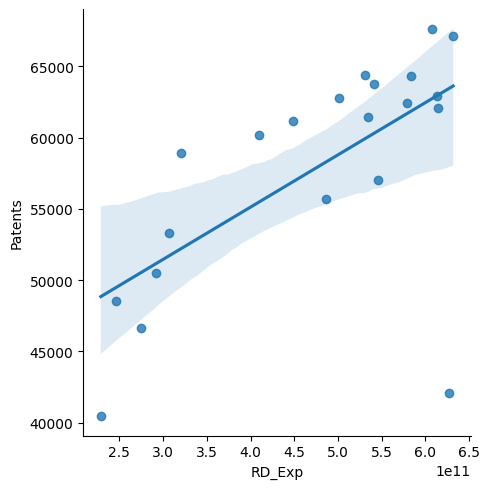

In [179]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="RD_Exp",y="Patents", data=mergedJapExpPat)

In [138]:
indep = dfJapExp[["RD_Exp"]]
dep = dfJapPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                  -2.032
Model:                            OLS   Adj. R-squared (uncentered):             -2.191
Method:                 Least Squares   F-statistic:                             -12.73
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                        1.00
Time:                        08:10:51   Log-Likelihood:                         -217.20
No. Observations:                  20   AIC:                                      436.4
Df Residuals:                      19   BIC:                                      437.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      1.151e-07   5.76e-09     19.970      0.000    1.03e-07    1.27e-07
==============================================================================
Omnibus:                        2.494   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.053
Skew:                          -0.506   Prob(JB):                        0.591
Kurtosis:                       3.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#Pearson, Kendall, and Spearman correlation for Japan
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.5565603044079475, pvalue=0.010812595618733248)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [140]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.205580
p-value: 0.671191
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [181]:
#making data stationary
dfP_log=np.sqrt(dfJapPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfJapExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [182]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,17310.095891,19.149083
2,28288.237231,-4.307465
3,16049.059163,8.781611
4,13946.372598,6.216916
5,12391.021924,11.851966


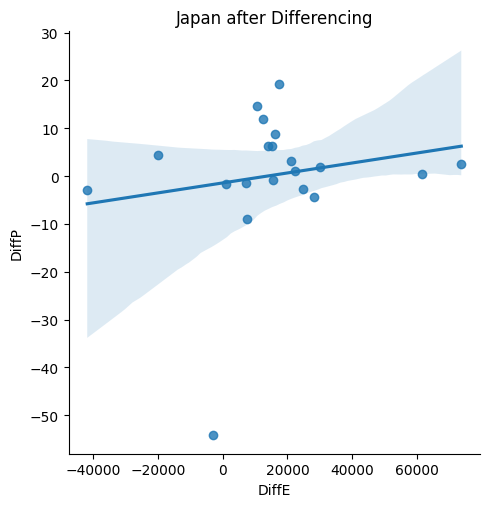

In [183]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "Japan after Differencing")

In [143]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):             -0.040
Method:                 Least Squares   F-statistic:                             0.2647
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                       0.613
Time:                        08:13:19   Log-Likelihood:                         -76.610
No. Observations:                  19   AIC:                                      155.2
Df Residuals:                      18   BIC:                                      156.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      5.717e-05      0.000      0.514      0.613      -0.000       0.000
==============================================================================
Omnibus:                       35.357   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.458
Skew:                          -2.851   Prob(JB):                     1.68e-19
Kurtosis:                      11.758   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
#Pearson, Kendall, and Spearman correlation for Japan
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.1802650202213604, pvalue=0.4602133972492521)

In [145]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.467897
p-value: 0.000000
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [184]:
#linear regression Italy
#calculating annual R&D expenditure and then differences between years
It["RD_Exp"] = It["Value"]
dfItExp = It.groupby("Time").sum('RD_Exp').reset_index()
#dfJapExp = dfJap[:-1]
#dfItExp['DifExp'] = dfItExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfItPat = dfPatT.loc[dfPatT["Country"].isin(["Italy"])].reset_index()
dfItPat["Patents"] = dfItPat["Value"]
#dfItPat['DifPat'] = dfItPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\3986498648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  It["RD_Exp"] = It["Value"]


In [185]:
#choosing same data type for merge column
dfItPat["Time"]=dfItPat["Time"].astype("int64")
dfItExp["Time"]=dfItExp["Time"].astype("int64")

#merging GDP and Exp data
mergedItExpPat = dfItPat.merge(dfItExp, on="Time")

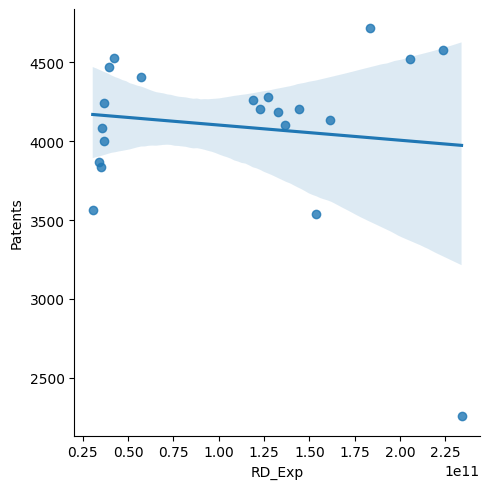

In [186]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="RD_Exp",y="Patents", data=mergedItExpPat)

In [187]:
indep = dfItExp[["RD_Exp"]]
dep = dfItPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              45.75
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                    1.84e-06
Time:                        08:22:58   Log-Likelihood:                         -182.74
No. Observations:                  20   AIC:                                      367.5
Df Residuals:                      19   BIC:                                      368.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      2.654e-08   3.92e-09      6.764      0.000    1.83e-08    3.48e-08
==============================================================================
Omnibus:                        2.414   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                1.445
Skew:                          -0.658   Prob(JB):                        0.486
Kurtosis:                       3.016   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#Pearson, Kendall, and Spearman correlation for Italy
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.2008567820299052, pvalue=0.39581250705326265)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [189]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.703339
p-value: 0.999087
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [190]:
#making data stationary
dfP_log=np.sqrt(dfItPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfItExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [191]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,9027.170436,2.486296
2,3633.440511,-0.257864
3,3644.902942,1.349964
4,-1529.144475,0.652561
5,2434.164261,1.216487


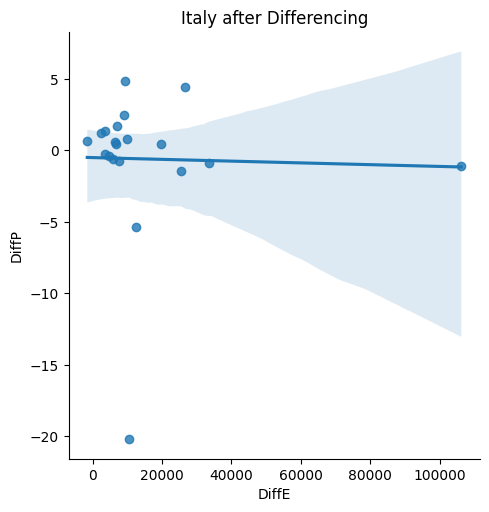

In [192]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "Italy after Differencing")

In [193]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.045
Method:                 Least Squares   F-statistic:                             0.1864
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                       0.671
Time:                        08:23:44   Log-Likelihood:                         -57.784
No. Observations:                  19   AIC:                                      117.6
Df Residuals:                      18   BIC:                                      118.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp     -1.841e-05   4.26e-05     -0.432      0.671      -0.000    7.12e-05
==============================================================================
Omnibus:                       36.515   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.159
Skew:                          -2.954   Prob(JB):                     9.73e-21
Kurtosis:                      12.028   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
#Pearson, Kendall, and Spearman correlation for Italy
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.01900778937620863, pvalue=0.9384368342108595)

In [195]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.467857
p-value: 0.123492
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [196]:
#linear regression UK
#calculating annual R&D expenditure and then differences between years
UK["RD_Exp"] = UK["Value"]
dfUKExp = It.groupby("Time").sum('RD_Exp').reset_index()
#dfJapExp = dfJap[:-1]
#dfUKExp['DifExp'] = dfUKExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfUKPat = dfPatT.loc[dfPatT["Country"].isin(["United Kingdom"])].reset_index()
dfUKPat["Patents"] = dfUKPat["Value"]
#dfUKPat['DifPat'] = dfUKPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\3960129698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["RD_Exp"] = UK["Value"]


In [197]:
#choosing same data type for merge column
dfUKPat["Time"]=dfUKPat["Time"].astype("int64")
dfUKExp["Time"]=dfUKExp["Time"].astype("int64")

#merging GDP and Exp data
mergedUKExpPat = dfUKPat.merge(dfUKExp, on="Time")

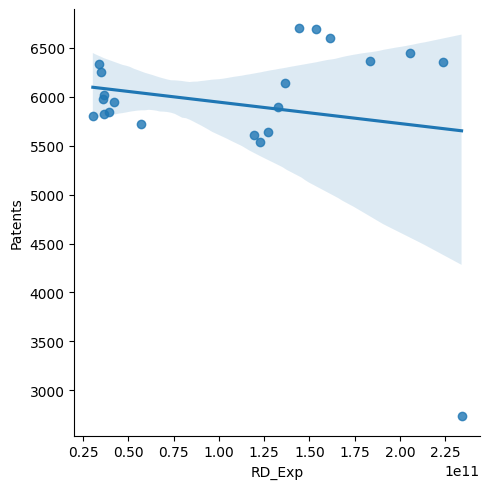

In [198]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="RD_Exp",y="Patents", data=mergedUKExpPat)

In [199]:
indep = dfUKExp[["RD_Exp"]]
dep = dfUKPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              44.65
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                    2.17e-06
Time:                        08:25:31   Log-Likelihood:                         -190.24
No. Observations:                  20   AIC:                                      382.5
Df Residuals:                      19   BIC:                                      383.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      3.814e-08   5.71e-09      6.682      0.000    2.62e-08    5.01e-08
==============================================================================
Omnibus:                        4.441   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.506
Skew:                          -0.819   Prob(JB):                        0.286
Kurtosis:                       3.569   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
#Pearson, Kendall, and Spearman correlation for UK
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.2028520915064238, pvalue=0.391036894175341)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [202]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.703339
p-value: 0.999087
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [204]:
#making data stationary
dfP_log=np.sqrt(dfUKPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfUKExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [205]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,9027.170436,3.401882
2,3633.440511,-0.497794
3,3644.902942,-1.538323
4,-1529.144475,-0.258285
5,2434.164261,-0.956704


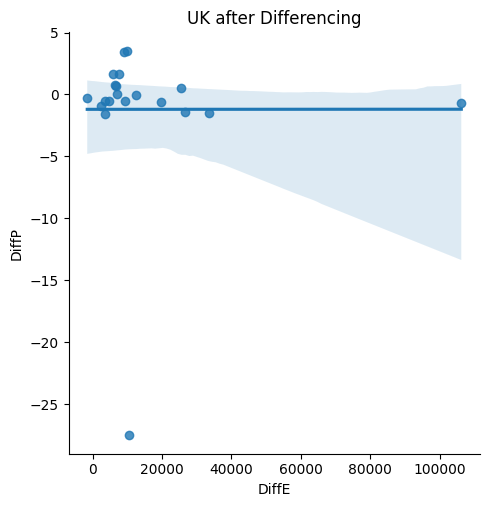

In [206]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "UK after Differencing")

In [207]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):             -0.041
Method:                 Least Squares   F-statistic:                             0.2510
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                       0.622
Time:                        08:26:55   Log-Likelihood:                         -62.127
No. Observations:                  19   AIC:                                      126.3
Df Residuals:                      18   BIC:                                      127.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp     -2.685e-05   5.36e-05     -0.501      0.622      -0.000    8.58e-05
==============================================================================
Omnibus:                       46.475   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.655
Skew:                          -3.742   Prob(JB):                     1.96e-38
Kurtosis:                      15.781   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
#Pearson, Kendall, and Spearman correlation for UK
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.011641459374038161, pvalue=0.9622739092847418)

In [209]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.467857
p-value: 0.123492
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [215]:
#linear regression Korea
#calculating annual R&D expenditure and then differences between years
Kor["RD_Exp"] = Kor["Value"]
dfKorExp = Kor.groupby("Time").sum('RD_Exp').reset_index()
dfKorExp = dfKorExp[:-1]
#dfKorExp['DifExp'] = dfKorExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfKorPat = dfPatT.loc[dfPatT["Country"].isin(["Korea"])].reset_index()
dfKorPat["Patents"] = dfKorPat["Value"]
#dfKorPat['DifPat'] = dfKorPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\4103363981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kor["RD_Exp"] = Kor["Value"]


In [216]:
#choosing same data type for merge column
dfKorPat["Time"]=dfKorPat["Time"].astype("int64")
dfKorExp["Time"]=dfKorExp["Time"].astype("int64")

#merging GDP and Exp data
mergedKorExpPat = dfKorPat.merge(dfKorExp, on="Time")

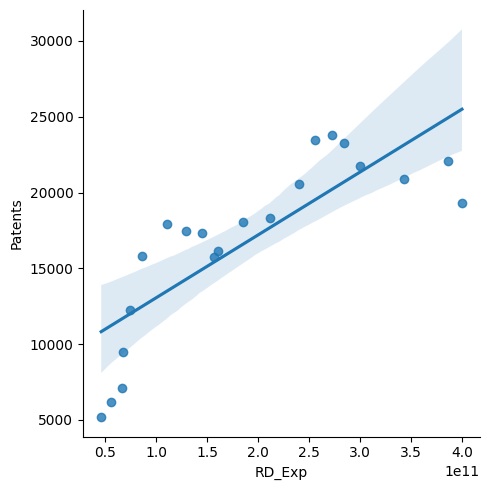

In [217]:
sns.lmplot(x="RD_Exp",y="Patents", data=mergedKorExpPat)

In [218]:
indep = dfKorExp[["RD_Exp"]]
dep = dfKorPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   1.306
Model:                            OLS   Adj. R-squared (uncentered):              1.322
Method:                 Least Squares   F-statistic:                             -81.05
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                        1.00
Time:                        08:30:48   Log-Likelihood:                         -201.06
No. Observations:                  20   AIC:                                      404.1
Df Residuals:                      19   BIC:                                      405.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      7.674e-08   5.76e-09     13.312      0.000    6.47e-08    8.88e-08
==============================================================================
Omnibus:                        6.871   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.461
Skew:                          -1.081   Prob(JB):                        0.107
Kurtosis:                       3.822   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
#Pearson, Kendall, and Spearman correlation for Korea
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.7964431681739624, pvalue=2.649824730275378e-05)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [221]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.336617
p-value: 0.996806
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [223]:
#making data stationary
dfP_log=np.sqrt(dfKorPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfKorExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [224]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,21782.763970,6.728747
2,22095.230558,5.658681
3,1714.951814,12.985998
4,11444.522635,13.486940
5,21853.293015,14.999599


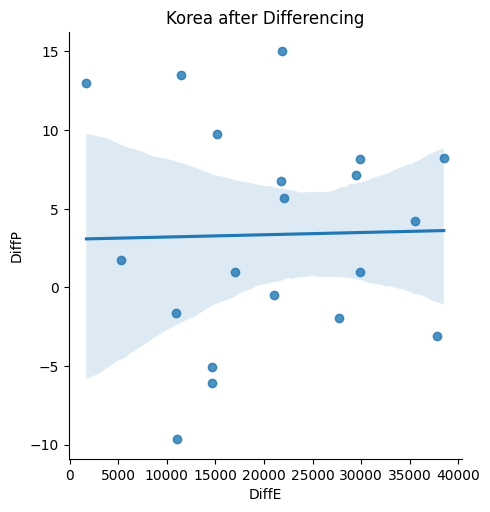

In [225]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "Korea after Differencing")

In [226]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.147
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              3.101
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                      0.0952
Time:                        08:31:53   Log-Likelihood:                         -63.858
No. Observations:                  19   AIC:                                      129.7
Df Residuals:                      18   BIC:                                      130.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp         0.0001   7.04e-05      1.761      0.095   -2.39e-05       0.000
==============================================================================
Omnibus:                        0.989   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.868
Skew:                           0.295   Prob(JB):                        0.648
Kurtosis:                       2.135   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
#Pearson, Kendall, and Spearman correlation for Korea
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.019801620315203064, pvalue=0.9358706806051801)

In [228]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.890791
p-value: 0.790990
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [232]:
#linear regression France
#calculating annual R&D expenditure and then differences between years
Fr["RD_Exp"] = Fr["Value"]
dfFrExp = Fr.groupby("Time").sum('RD_Exp').reset_index()
#dfFrExp = dfFrExp[:-1]
#dfFrExp['DifExp'] = dfFrExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfFrPat = dfPatT.loc[dfPatT["Country"].isin(["France"])].reset_index()
dfFrPat = dfFrPat[:-2]
dfFrPat["Patents"] = dfFrPat["Value"]
#dfFrPat['DifPat'] = dfFrPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_15992\916466034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fr["RD_Exp"] = Fr["Value"]


In [233]:
#choosing same data type for merge column
dfFrPat["Time"]=dfFrPat["Time"].astype("int64")
dfFrExp["Time"]=dfFrExp["Time"].astype("int64")

#merging GDP and Exp data
mergedFrExpPat = dfFrPat.merge(dfFrExp, on="Time")

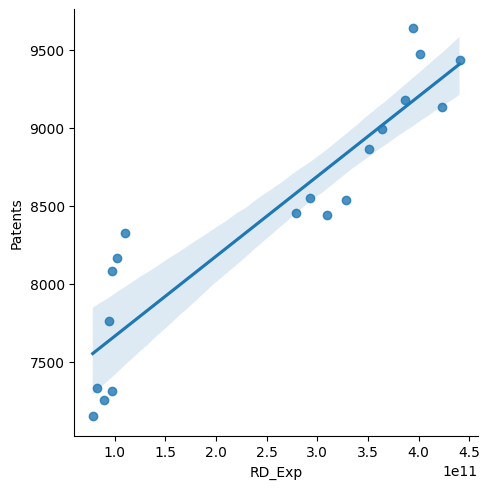

In [234]:
sns.lmplot(x="RD_Exp",y="Patents", data=mergedFrExpPat)

In [235]:
indep = dfFrExp[["RD_Exp"]]
dep = dfFrPat[[ "Patents"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              91.92
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                    2.86e-08
Time:                        08:33:38   Log-Likelihood:                         -171.74
No. Observations:                  18   AIC:                                      345.5
Df Residuals:                      17   BIC:                                      346.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp       2.69e-08   2.81e-09      9.587      0.000     2.1e-08    3.28e-08
==============================================================================
Omnibus:                       12.185   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                2.276
Skew:                           0.253   Prob(JB):                        0.320
Kurtosis:                       1.333   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
#Pearson, Kendall, and Spearman correlation for France
S = []
for row in X.RD_Exp:
    S.append(row)
T = []
for row in y.Patents:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.910959897527282, pvalue=1.4978515470215375e-07)

In [ ]:
spearmanr(S,T)

In [ ]:
kendalltau(S,T)

In [237]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.498004
p-value: 0.892405
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


In [239]:
#making data stationary
dfP_log=np.sqrt(dfFrPat['Patents'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfFrExp['RD_Exp'])
dfE_diff=dfE_log.diff().dropna()

In [240]:
diffEP = {'DiffE':dfE_diff,'DiffP':dfP_diff}
dfdiffEP = pd.DataFrame(diffEP)
dfdiffEP.head()

,DiffE,DiffP
1,7050.846898,1.051979
2,12230.707248,-0.427450
3,12828.252137,0.333946
4,-5321.127097,2.569276
5,5715.359247,1.831558


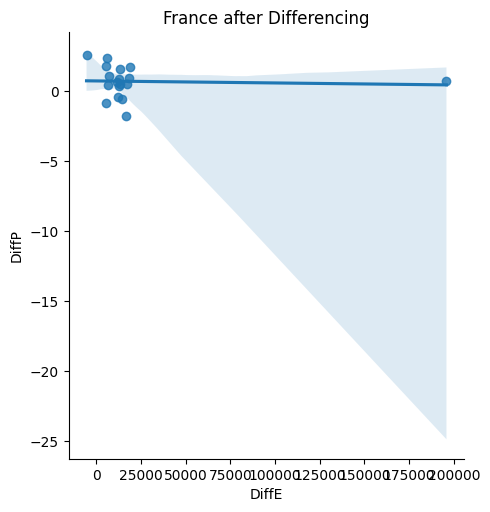

In [241]:
sns.lmplot(x="DiffE",y="DiffP", data = dfdiffEP ).set(title = "France after Differencing")

In [242]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Patents   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):             -0.022
Method:                 Least Squares   F-statistic:                             0.6377
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                       0.436
Time:                        08:34:43   Log-Likelihood:                         -28.319
No. Observations:                  17   AIC:                                      58.64
Df Residuals:                      16   BIC:                                      59.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD_Exp      5.205e-06   6.52e-06      0.799      0.436   -8.61e-06     1.9e-05
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.212
Skew:                          -0.098   Prob(JB):                        0.899
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
#Pearson, Kendall, and Spearman correlation for France
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.050561316362197226, pvalue=0.8471839039248485)

In [244]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.895256
p-value: 0.002070
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674
